In [4]:
import pandas as pd
import random
from copy import deepcopy
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/ratings_small.csv')
df.drop(columns=["timestamp"], inplace=True)
df = df.pivot(index=["userId"], columns=["movieId"])
df.fillna(2.5, inplace=True)
A = df.to_numpy()
df

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
1          2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
2          2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    4.0   
3          2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
4          2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    4.0   
5          2.5    2.5    4.0    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
667        2.5    2.5    2.5    2.5    2.5    4.0    2.5    2.5    2.5    2.5   
668        2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
669        2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
670        4.0    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
671        5.0    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   

         ...                                                                 \
movieId  ... 161084 161155 161594 161830 161918 161944 162376 162542 162672   
userId   ...                                                                  
1        ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
2        ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
3        ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
4        ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
5        ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
667      ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
668      ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
669      ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
670      ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   
671      ...    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5    2.5   

                
movieId 163949  
userId          
1          2.5  
2          2.5  
3          2.5  
4          2.5  
5          2.5  
...        ...  
667        2.5  
668        2.5  
669        2.5  
670        2.5  
671        2.5  

[671 rows x 9066 columns]

In [6]:
ind = [(random.randint(0,670), random.randint(0,9065)) for i in range(1000)]

In [7]:
B = deepcopy(A)
for i,j in ind:
    B[i][j] = random.randint(0,5)

In [8]:
X, Y, Z = svd(B)
Y[-300:] = 0
sigma = diagsvd(Y, B.shape[0], B.shape[1])
B = X @ sigma @ Z

In [9]:
avaliacao_real = np.array([A[i][j] for i,j in ind])
avaliacao_calc = np.array([B[i][j] for i,j in ind])
erro = avaliacao_real - avaliacao_calc

In [10]:
media = np.mean(erro)
desvio_padrao = np.std(erro)
x = np.linspace(min(erro), max(erro), 100)
curva_normal = 1/(desvio_padrao * np.sqrt(2*np.pi)) * np.exp(-(x-media)**2 / (2*desvio_padrao**2))

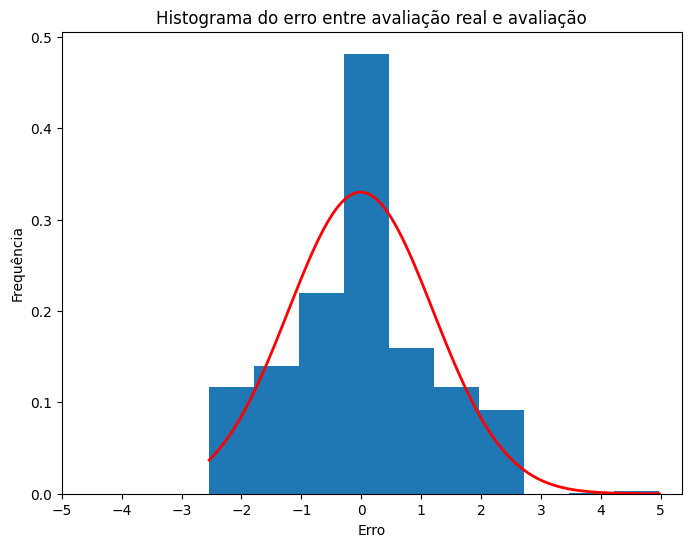

In [11]:
plt.figure(figsize=(8,6))
plt.hist(erro, bins=10, density=True)
plt.plot(x, curva_normal, 'r', linewidth=2)
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.xticks(np.arange (-5, 5.1, 1))
plt.title('Histograma do erro entre avaliação real e avaliação')
plt.show()